In [16]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, neighbors

from sklearn.neighbors import KNeighborsClassifier 
%matplotlib inline

from sklearn.model_selection import train_test_split



In [2]:
cd Documents/TCC/base/

/home/thiago/Documents/TCC/base


In [3]:
londres = pd.read_csv('rssi.csv')

In [4]:
londres.head(5)

,N3,N4,N2,Distância,Ângulo,Label
0,-58,-59,-40,5,0,5_0
1,-55,-59,-41,5,0,5_0
2,-54,-59,-42,5,0,5_0
3,-60,-58,-41,5,0,5_0
4,-60,-56,-41,5,0,5_0


In [63]:
londres['Label'] = londres['Label'].astype('category').cat.codes

In [64]:
londres.head(10)

,N3,N4,N2,Distância,Ângulo,Label
0,-0.905509,1.146136,1.538036,5,0,35
1,-0.434568,1.146136,1.370314,5,0,35
2,-0.277588,1.146136,1.202592,5,0,35
3,-1.219470,1.361629,1.370314,5,0,35
4,-1.219470,1.792615,1.370314,5,0,35
5,-1.376450,1.577122,1.370314,5,0,35
6,-1.533431,1.577122,0.867148,5,0,35
7,-1.690411,1.577122,0.867148,5,0,35
8,-1.847391,0.930644,1.034870,5,0,35
9,-1.847391,1.146136,0.699426,5,0,35


In [6]:
londres.Label.value_counts()

37    101
1     101
8     101
23    101
15    101
16    101
2     101
9     101
38    101
29    101
30    101
36    101
22    101
21    100
13    100
5     100
32    100
40    100
28    100
20    100
12    100
4     100
25    100
39    100
33    100
26    100
27    100
19    100
11    100
7     100
35    100
34    100
18    100
14    100
6     100
41    100
0     100
3      99
24     99
10     99
17     99
31     99
Name: Label, dtype: int64

In [8]:
londres.sample(10)

,N3,N4,N2,Distância,Ângulo,Label
1362,-49,-58,-49,10,180,3
1985,-44,-61,-44,15,150,9
3394,-53,-65,-49,25,150,23
1380,-51,-61,-48,10,180,3
3585,-62,-76,-54,30,0,28
540,-40,-56,-41,5,150,37
3123,-51,-61,-45,25,90,27
1267,-52,-60,-50,10,150,2
1355,-55,-59,-44,10,180,3
3759,-54,-69,-50,30,60,33


In [20]:
from sklearn.cross_validation import train_test_split

In [24]:
londres.values

array([[-58, -59, -40, 5, 0, '5_0'],
       [-55, -59, -41, 5, 0, '5_0'],
       [-54, -59, -42, 5, 0, '5_0'],
       ...,
       [-55, -71, -50, 30, 180, '30_180'],
       [-55, -70, -51, 30, 180, '30_180'],
       [-56, -71, -51, 30, 180, '30_180']], dtype=object)

In [26]:
londres.columns

Index(['N3', 'N4', 'N2', 'Distância', 'Ângulo', 'Label'], dtype='object')

In [65]:
londres.describe()

,N3,N4,N2,Distância,Ângulo,Label
count,4.208000e+03,4.208000e+03,4.208000e+03,4208.000000,4208.000000,4208.000000
mean,-4.863030e-16,3.782357e-16,-5.943703e-16,17.494059,90.042776,20.504040
std,1.000000e+00,1.000000e+00,1.000000e+00,8.542457,59.939341,12.125541
min,-2.632293e+00,-5.318645e+00,-3.996788e+00,5.000000,0.000000,0.000000
25%,-5.915487e-01,-5.778052e-01,-6.423495e-01,10.000000,30.000000,10.000000
50%,-2.775881e-01,6.867294e-02,-1.391837e-01,15.000000,90.000000,21.000000
75%,5.073135e-01,7.151511e-01,5.317041e-01,25.000000,150.000000,31.000000
max,3.018999e+00,2.654585e+00,2.879811e+00,30.000000,180.000000,41.000000


In [66]:
#londres.Label.value_counts()

In [29]:
for c in ['N3', 'N4', 'N2']:
    londres[c] = (londres[c] - londres[c].mean())/londres[c].std()

In [30]:
londres.head()

,N3,N4,N2,Distância,Ângulo,Label
0,-0.905509,1.146136,1.538036,5,0,35
1,-0.434568,1.146136,1.370314,5,0,35
2,-0.277588,1.146136,1.202592,5,0,35
3,-1.219470,1.361629,1.370314,5,0,35
4,-1.219470,1.792615,1.370314,5,0,35


In [68]:
X = londres.values[:, :3]
y = londres.values[:, -1]
X
y

array([35., 35., 35., ..., 31., 31., 31.])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print(y_test)

[34.  6. 11.  7. 27.  6. 14. 16.  7.  3. 36.  6. 40. 12.  4. 24.  1.  0.
 15. 10. 27. 38. 26.  2. 33.  3. 31. 20.  4. 26. 15. 35.  1. 29.  4. 19.
 27. 16.  6. 10. 20. 11.  4. 29. 22. 15.  1.  8. 18. 28. 30. 27.  7.  6.
  3. 15. 40.  2.  7. 21. 32. 26. 19. 16. 23. 41. 14.  6. 36. 10. 37. 31.
  9. 22.  8. 20. 10. 27. 20.  9.  9.  7.  3.  1. 39. 36.  1.  1. 22. 12.
 15. 29.  0. 11. 33. 26. 16.  9. 30. 24. 17. 24. 12. 32. 33. 35.  2. 17.
 26. 18. 34. 19.  1. 23. 35. 11. 13. 28. 15. 19. 22. 41. 30.  1.  0.  0.
 36.  1. 25. 29. 25. 35. 31. 25. 12. 17. 16. 30. 24. 20.  9. 27. 27.  5.
 24. 40. 41.  0. 19. 18.  2. 19.  0. 38. 12. 23. 14. 34.  0. 30.  8.  4.
  4.  8.  0.  7. 12. 40. 26. 26. 14.  8. 18. 15. 21. 17. 32. 22.  1. 13.
 29. 22.  5. 28.  3.  2. 37. 19. 36. 32. 39. 35. 20.  5. 29. 11. 41.  8.
 33.  5. 38. 26. 32.  7. 39.  4. 39. 37. 24. 11. 18.  0. 21.  2.  4.  7.
  3. 37.  2. 36. 36. 39. 21. 24.  9. 10. 32. 10. 28. 26. 19. 15. 17. 25.
 31. 37. 26.  9.  8.  2. 19.  4.  3. 12. 36. 29.  3

In [55]:
knn =  KNeighborsClassifier(n_neighbors=10)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [57]:
predicao = knn.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(y_pred)
cmat = confusion_matrix(y_test, y_pred)

[ 7. 18. 38. 29. 30. 35.  5. 15. 23.  1. 22. 40. 19. 25. 20.  1. 36. 31.
 31. 30. 23. 10. 12. 21. 19.  5. 22.  3. 17. 12. 33. 12. 28. 16. 15. 31.
 39.  2. 20.  2. 33. 13. 19.  2. 13. 15. 35. 36. 20. 14. 36.  2. 36. 37.
 26. 34. 18. 33.  3. 28. 19. 25. 29. 26.  1. 15.  6. 24. 37.  0. 38. 31.
  9. 32.  2. 21. 18. 25. 19. 38. 38. 21. 30.  7. 13. 38. 20.  5. 14. 38.
 24. 26. 19.  7. 19.  9. 13.  2. 30.  1.  9. 32. 24. 11. 39. 32. 26. 17.
 31.  1.  1. 40.  6. 21. 38. 23. 36. 30. 27. 29.  7. 15. 32. 38. 20. 17.
 24. 24. 24. 17. 13. 13. 38. 28. 35. 19. 37. 39. 15. 27. 26.  6. 41. 34.
 40. 11. 40. 15.  1. 40. 27. 21. 20. 33. 30. 14. 19. 31.  3.  0. 31. 35.
 23. 34.  3.  2. 24. 33. 15. 22. 23.  5. 22. 35. 33.  7. 10. 40. 30.  5.
 15.  9. 37. 25. 27. 31. 14. 10. 32. 32. 17. 13. 17. 18. 17. 31. 17. 14.
 22. 39.  7. 33. 23. 16. 12. 22.  8.  2.  0.  6. 36. 38. 28. 40. 36. 36.
 12. 26. 35. 31. 34.  9. 29. 30.  1.  2.  8. 16. 34. 11.  1. 26. 23. 31.
 27. 11. 41. 23.  9. 23. 23. 32. 34. 38. 18. 30. 20

In [60]:
knn.score(X_test, y_test) 

0.6437054631828979

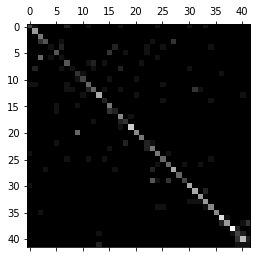

In [61]:
plt.matshow(cmat, cmap='gray')